# **Intro**

The dataset featured below was created by reconciling measurements from requests of gun violence incidents provided by the Gun Violence Archive (GVA).

Source: Gun Violence Incidents - https://www.gunviolencearchive.org

* Meaning of columns
    * incident id - incident unique identifier - (str)
    * incident date - recorded date of incident - (date)
    * state - US state in which the incident took place - (str)
    * city - city within the state where the incident took place - (str)
    * address - street address where the incident took place - (str)
    * killed - number of persons killed during incident - (int)
    * injured - number of persons injured during incident - (int)


# **Inspiration**
* Explore & Compare gun incidents by years, states

# **Data Process**

## Load data

In [1]:
import numpy as np
from numpy import median
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format  
pd.options.display.max_columns = 999

In [2]:
df = pd.read_csv("../input/gun-violence-incidents-in-the-usa/all_incidents.csv", parse_dates=['date'])

In [3]:
df.shape

(472820, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472820 entries, 0 to 472819
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   incident_id  472820 non-null  int64         
 1   date         472820 non-null  datetime64[ns]
 2   state        472820 non-null  object        
 3   city         472820 non-null  object        
 4   address      449089 non-null  object        
 5   n_killed     472820 non-null  int64         
 6   n_injured    472820 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 25.3+ MB


In [5]:
df.head()

,incident_id,date,state,city,address,n_killed,n_injured
0,2314858,2022-05-28,Arkansas,Little Rock,W 9th St and Broadway St,0,1
1,2314409,2022-05-28,Colorado,Denver,3300 block of Clay St,0,1
2,2314498,2022-05-28,Missouri,Saint Louis,Page Blvd and Vandeventer Ave,0,1
3,2314485,2022-05-28,South Carolina,Florence,Old River Rd,0,2
4,2314483,2022-05-28,California,Carmichael,4400 block of Manzanita Ave,1,0


## Data cleaning

In [6]:
missing_values = df.isnull().sum()
print(missing_values)

incident_id        0
date               0
state              0
city               0
address        23731
n_killed           0
n_injured          0
dtype: int64


In [7]:
total_cells = np.product(df.shape)
total_missing = missing_values.sum()
print(total_missing)

23731


In [8]:
percent_missing = round((total_missing/total_cells) * 100, 2)
percent_missing

0.72

Since there is only 0.72% missing values about adress colum, which is not important for my analysis, i will just leave those null values.

In [9]:
df.duplicated().value_counts()

False    471986
True        834
dtype: int64

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().value_counts()

False    471986
dtype: int64

In [12]:
df.shape

(471986, 7)

All duplicated values has been removed.

# **Exploring**

In [13]:
df['total'] = df['n_killed'] + df['n_injured']

In [14]:
df.head()

,incident_id,date,state,city,address,n_killed,n_injured,total
0,2314858,2022-05-28,Arkansas,Little Rock,W 9th St and Broadway St,0,1,1
1,2314409,2022-05-28,Colorado,Denver,3300 block of Clay St,0,1,1
2,2314498,2022-05-28,Missouri,Saint Louis,Page Blvd and Vandeventer Ave,0,1,1
3,2314485,2022-05-28,South Carolina,Florence,Old River Rd,0,2,2
4,2314483,2022-05-28,California,Carmichael,4400 block of Manzanita Ave,1,0,1


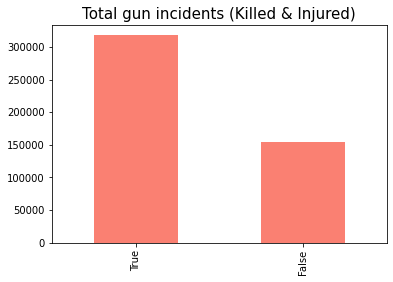

In [15]:
total_over_0 = df['total'] != 0

total_over_0.value_counts().plot(kind='bar',color='salmon')

plt.title("Total gun incidents (Killed & Injured)", size=15)

plt.show()

Check the total of gun incidents
* Total - 471986
    * Gun incidents - 318047
    * No incidents - 121736

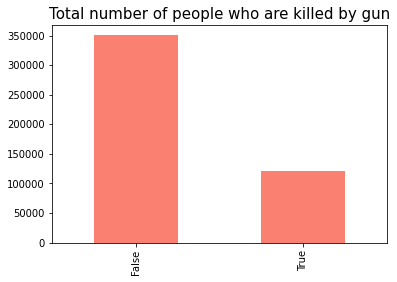

In [16]:
killed = df['n_killed'] != 0
killed.value_counts().plot(kind='bar', color='salmon')

plt.title("Total number of people who are killed by gun", size=15)

plt.show()

Check the total number of victims in this dataset.
* Total - 471986
    * Killed - 121736
    * Not Killed - 350250
    

#### **Explore & Compare gun incidents by years, states**

In [17]:
cleaned_data = df[(df['date'].dt.year != 2013) & (df['date'].dt.year != 2022)]

In [18]:
incidents_total = df.groupby(cleaned_data['date'].dt.year)['total'].sum()

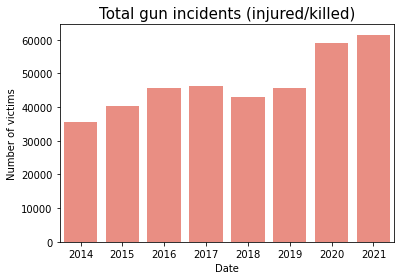

In [19]:
sns.barplot(x=incidents_total.index.astype(int), y=incidents_total, color='salmon')

plt.title("Total gun incidents (injured/killed)", size=15)
plt.xlabel('Date')
plt.ylabel("Number of victims")

plt.show()

We see that the incidents are increased over the years.

In [20]:
c_killed = df.groupby(cleaned_data['date'].dt.year)['n_killed'].sum()

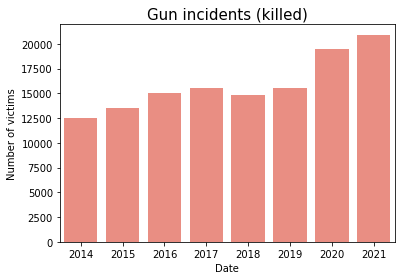

In [21]:
sns.barplot(x=c_killed.index.astype(int), y=c_killed, color='salmon')

plt.title("Gun incidents (killed)", size=15)
plt.xlabel("Date")
plt.ylabel("Number of victims")

plt.show()

In [22]:
state = df.groupby("state")['total'].sum().sort_values(ascending=False)

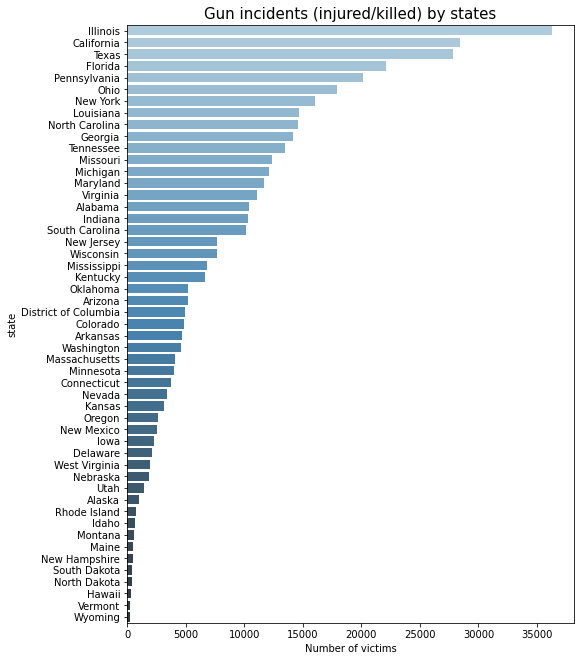

In [23]:
fig, ax = plt.subplots(figsize=(8,11))

sns.barplot(x=state, y=state.index, ax=ax, palette="Blues_d")
plt.title("Gun incidents (injured/killed) by states", size=15)
plt.xlabel("Number of victims")

plt.show()

In [24]:
k_state = df.groupby("state")['n_killed'].sum().sort_values(ascending=False)

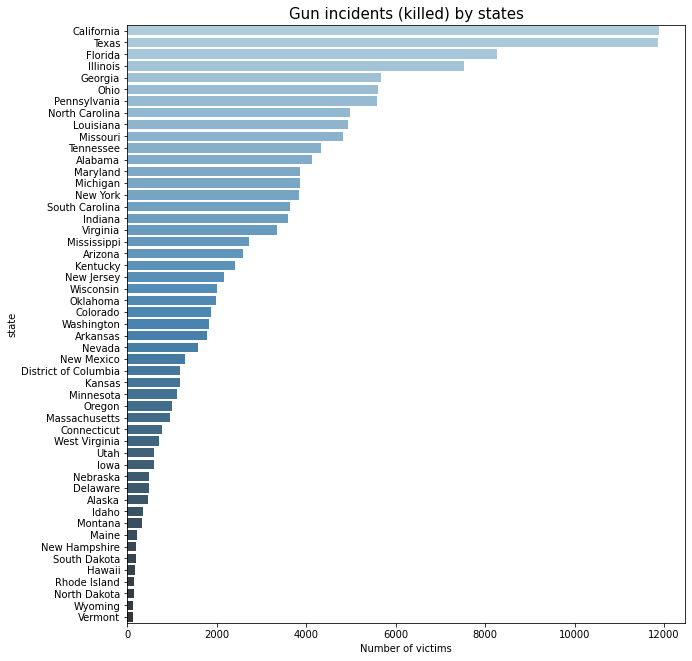

In [25]:
fig, ax = plt.subplots(figsize=(10,11))

sns.barplot(x=k_state, y=k_state.index, ax=ax, palette="Blues_d")
plt.title("Gun incidents (killed) by states", size=15)
plt.xlabel("Number of victims")

plt.show()

In [26]:
city = df.groupby("city")['total'].sum().sort_values(ascending=False).head(50)

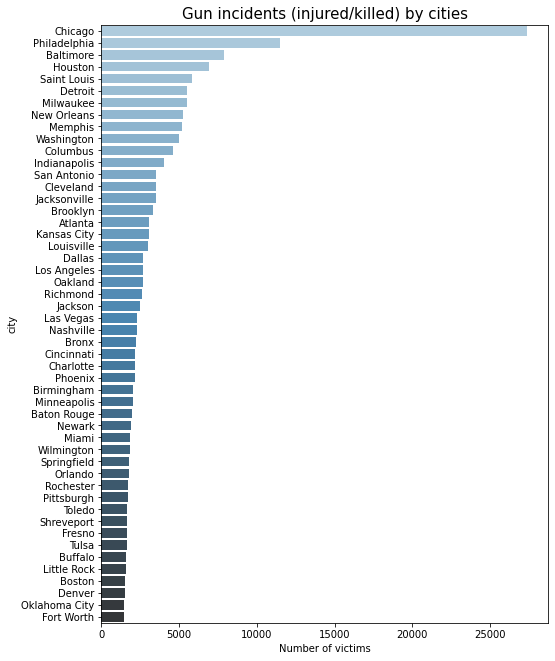

In [27]:
fig, ax = plt.subplots(figsize=(8,11))

sns.barplot(x=city, y=city.index, palette='Blues_d')
plt.title('Gun incidents (injured/killed) by cities', size=15)
plt.xlabel("Number of victims")

plt.show()

In [28]:
k_city = df.groupby("city")['n_killed'].sum().sort_values(ascending=False).head(50)

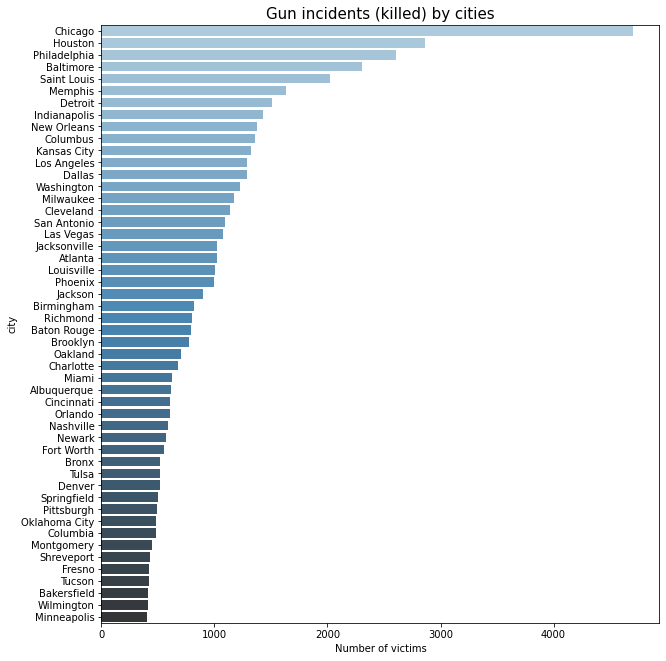

In [29]:
fig, ax = plt.subplots(figsize=(10,11))

sns.barplot(x=k_city, y=k_city.index, palette='Blues_d')
plt.title('Gun incidents (killed) by cities', size=15)
plt.xlabel("Number of victims")

plt.show()

# **Conclusion**

### Year
* Gun incidetns in USA are increased over the years (2014-2021).

### State
* The top3 **states**, where have the highst number of **gun incidents**, are:
    * 1. Illinois
    * 2. California
    * 3. Texas
    * This is very surprising, when we consider that the state of illinois is **5th(11M)** most populous state in USA. But illinois has the highst gun incident rate, while califirnia and texas are the 1th (39M) and 2th (27M) most populos states in USA.
   
  
* The top3 **states**, where have the highst number of **victims (killed)**, are:
    * 1. California
    * 2. Texas
    * 3. Illinois
    
### City
* The top3 **cities**, where have the highst number of **gun incidnets**, are:
    * 1. Chicago (illinois)
    * 2. Philadelphia (Pennsylvania)
    * 3. Baltimore (Maryland)
    * This is interesting that top3 cities are not from top3 states, like illinois, california and texas.
    
    
* The top3 **cities**, where have the highst number of **victims (killed)**, are:
    * 1. Chicago
    * 2. Houston
    * 3. Philadelphia

    